# CAPSTONE PROJECT I 

## Predicting Pain Relievers Based on Age and Satisfaction Level

According to researchers both prescribed and non-prescribed use of pain relievers, as well as rates of opioid-related mortality and admissions to emergency departments, have increased in the last few years. There are many different pain relievers, and each one has advantages and risks. Some types of pain respond better to certain medicines than others. Each person has a different response to a pain reliever for the same type of condition. The dataset used in this project was acquired from kaggle where uploaded on kaggle by scraping the WebMD site (https://www.kaggle.com/rohanharode07/webmd-drugreviews-dataset). The dataset contains 12 variables but in this project we utilize only 7 variables which includes: age, condition, drug, ease of use, effectiveness, satisfaction level of users and the gender of responders. The aim of this project is to identify the users’ response for different pain reliever for the same type of condition and answer the questions below: i. Predict the type of pain relievers for which type of condition based on drug rating (satisfaction), age and sex? ii. Predicting the rating (satisfaction level) based on ease of use and effectiveness The possible stakeholders of this project includes pharmaceutical companies, physicians and clinicians, insurance companies and patients. Knowing the type of pain relievers based on users' response across age distribution and gender helps physicians and clinicians while subscribing to these drugs. Pharmaceutical companies and insurance companies will also identify their focus drugs for their users. Creating a customized logical or scientific communication platform benefits both health and economic success of patients as well

##  1. Importing the relevant libraries and load the data into the data frame

In [1]:
#Importing some libraries and modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind
sns.set()
%matplotlib inline

In [2]:
#the dataset is in csv format so we'll use read_csv function in pandas and replace blank space with NaN by "na_values=' ' "
df=pd.read_csv('webmd.csv', na_values=' ')

In [3]:
#to display the top 2 rows
df.head(2)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1


In [4]:
#to display the tail 2 rows
df.tail(2)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1
362805,45-54,Stop Smoking,11/12/2008,chantix,144470,4,5,"One year ago, I tried Chantix and had to stop ...",5,Female,"Nausea , headache , vomiting , drowsiness, g...",3


In [5]:
#total shape of dataset
df.shape

(362806, 12)

## 2. Checking the dataset, cleaning and manupulation

Before diving into data analysis it is important to check whether there are missing values, inconsistent formatting, malformed records or nonsensical outliers. Null values checked in the main dataset and after the selecting pain condition the null values needs to be check. Looking at the dataset under consideration, there is no variables that inconsistent formatting and records or nonsensical outliers.

### 2.1 Checking the dataset

In [6]:
#datatype of each attributes of cleaned data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
Age              350604 non-null object
Condition        362763 non-null object
Date             362806 non-null object
Drug             362806 non-null object
DrugId           362806 non-null int64
EaseofUse        362806 non-null int64
Effectiveness    362806 non-null int64
Reviews          320945 non-null object
Satisfaction     362806 non-null int64
Sex              336269 non-null object
Sides            345346 non-null object
UsefulCount      362806 non-null int64
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


In [7]:
#Only some attributes are considered in this project we'll drop attributes that aren't considered.
df=df.drop(['Date', 'DrugId', 'Reviews', 'Sides', 'UsefulCount'], axis=1)

In [8]:
#Checking the statistical summary of data
df.describe(include='all')

,Age,Condition,Drug,EaseofUse,Effectiveness,Satisfaction,Sex
count,350604,362763,362806,362806.000000,362806.000000,362806.000000,336269
unique,11,1805,7093,NaN,NaN,NaN,2
top,45-54,Other,cymbalta,NaN,NaN,NaN,Female
freq,80043,49765,4648,NaN,NaN,NaN,238226
mean,NaN,NaN,NaN,4.019829,3.532061,3.135408,NaN
std,NaN,NaN,NaN,1.317711,1.455961,1.611106,NaN
min,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,3.000000,3.000000,1.000000,NaN
50%,NaN,NaN,NaN,5.000000,4.000000,3.000000,NaN
75%,NaN,NaN,NaN,5.000000,5.000000,5.000000,NaN


### 2.2 Data cleaning and manupulation

looking at the count of each attributes there is a difference between each features which indicates that there are null values. Check if null values exist in the dataset.

In [9]:
print('Do null values exist in the dataset? ' + str(df.isnull().values.any()))
#if null values exist calculate the total null vaues in each column:
df.isna().sum()

Do null values exist in the dataset? True


Age              12202
Condition           43
Drug                 0
EaseofUse            0
Effectiveness        0
Satisfaction         0
Sex              26537
dtype: int64

In [10]:
#since Age and Sex are the determining variable through out this project, they cant be null, 
#hence drop the null values from data set.
df.dropna(inplace=True)

In [11]:
#shape the remaining data
df.shape

(331541, 7)

In [12]:
#in the same way, the max value EaseofUse, Effectiveness and Satisfaction 
df.describe(include='all')

,Age,Condition,Drug,EaseofUse,Effectiveness,Satisfaction,Sex
count,331541,331541,331541,331541.000000,331541.000000,331541.000000,331541
unique,11,1742,6793,NaN,NaN,NaN,2
top,45-54,Other,cymbalta,NaN,NaN,NaN,Female
freq,75991,46926,4400,NaN,NaN,NaN,234797
mean,NaN,NaN,NaN,4.047168,3.541333,3.144908,NaN
std,NaN,NaN,NaN,1.299580,1.450075,1.608340,NaN
min,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,3.000000,3.000000,1.000000,NaN
50%,NaN,NaN,NaN,5.000000,4.000000,3.000000,NaN
75%,NaN,NaN,NaN,5.000000,5.000000,5.000000,NaN


In [13]:
df[df.EaseofUse==6]

,Age,Condition,Drug,EaseofUse,Effectiveness,Satisfaction,Sex
195073,35-44,Migraine Prevention,"topamax capsule, sprinkle",6,6,6,Female
195282,35-44,Migraine Prevention,topamax,6,6,6,Female


In [14]:
df=df.drop([195073,195282])
df.shape

(331539, 7)

## 3 Data Analysis

The aim of our research is to predict painkiller for different age group considering different condition and other features. Hence we chosed seven very common painkiller hydrocodone-acetaminophen, lyrica,neurontin,cymbalta,gabapentin,tramadol hcl, oxycontin.

In [15]:
df.Drug.value_counts().head(15)

cymbalta                                               4400
lisinopril                                             3972
lisinopril solution                                    3972
lexapro                                                3854
hydrocodone-acetaminophen                              3618
effexor xr                                             3256
lyrica                                                 2881
tramadol hcl er                                        2713
tramadol hcl                                           2713
zoloft                                                 2510
prednisone                                             2411
prednisone tablet, delayed release (enteric coated)    2411
prednisone concentrate                                 2411
seroquel                                               2285
phentermine hcl                                        2229
Name: Drug, dtype: int64

In [16]:
drug=df[df['Drug'].isin(['lyrica','neurontin','cymbalta','gabapentin','tramadol hcl',
                            'hydrocodone-acetaminophen','oxycontin'])] 
print('Total unique conditions for selected drugs is '+ str(drug.Condition.nunique()))
drug.Condition.value_counts().head(10)

Total unique conditions for selected drugs is 28


Pain                                                         5153
Neuropathic Pain                                             3614
Other                                                        2244
Major Depressive Disorder                                    1831
Disorder characterized by Stiff, Tender & Painful Muscles    1415
Chronic Pain                                                 1148
Pain Originating From a Nerve                                 912
Repeated Episodes of Anxiety                                  553
Chronic Muscle or Bone Pain                                   383
Chronic Pain with Narcotic Drug Tolerance                     285
Name: Condition, dtype: int64

There are 28 unique condition with different frequency for the selected pain killer. Hence it better to consider top five condition for the selected drugs except the condition 'Other' as it is vague.  

In [17]:
data=drug[drug['Condition'].isin(['Neuropathic Pain', 'Pain', 'Disorder characterized by Stiff, Tender & Painful Muscles','Chronic Pain','Pain Originating From a Nerve'])]

In [18]:
data.describe(include='all')

,Age,Condition,Drug,EaseofUse,Effectiveness,Satisfaction,Sex
count,12242,12242,12242,12242.000000,12242.000000,12242.000000,12242
unique,11,5,7,NaN,NaN,NaN,2
top,45-54,Pain,hydrocodone-acetaminophen,NaN,NaN,NaN,Female
freq,3419,5153,3504,NaN,NaN,NaN,8182
mean,NaN,NaN,NaN,4.161983,3.448048,3.240647,NaN
std,NaN,NaN,NaN,1.177277,1.377562,1.533576,NaN
min,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,4.000000,3.000000,2.000000,NaN
50%,NaN,NaN,NaN,5.000000,4.000000,4.000000,NaN
75%,NaN,NaN,NaN,5.000000,5.000000,5.000000,NaN


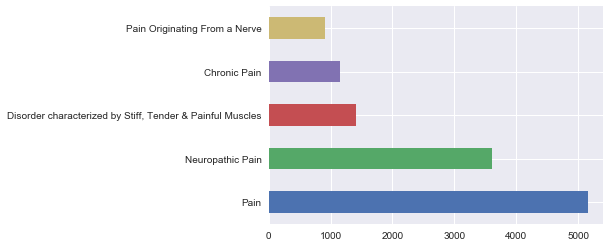

In [19]:
data.Condition.value_counts().plot(kind='barh')

In [20]:
data.Condition.value_counts()

Pain                                                         5153
Neuropathic Pain                                             3614
Disorder characterized by Stiff, Tender & Painful Muscles    1415
Chronic Pain                                                 1148
Pain Originating From a Nerve                                 912
Name: Condition, dtype: int64

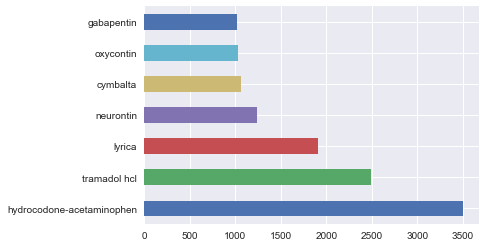

In [21]:
data.Drug.value_counts().plot(kind='barh')

In [22]:
c1=data[data['Condition']=='Pain'].sample(frac=0.3881,replace=True)
c2=data[data['Condition']=='Neuropathic Pain'].sample(frac=0.5534,replace=True)
c3=data[data['Condition']=='Disorder characterized by Stiff, Tender & Painful Muscles'].sample(frac=1.4134,replace=True)
c4=data[data['Condition']=='Chronic Pain'].sample(frac=1.742,replace=True)
c5=data[data['Condition']=='Pain Originating From a Nerve'].sample(frac=2.193,replace=True)

In [23]:
drug=pd.concat([c1,c2,c3,c4,c5])

In [24]:
df=drug.reset_index(drop=True)

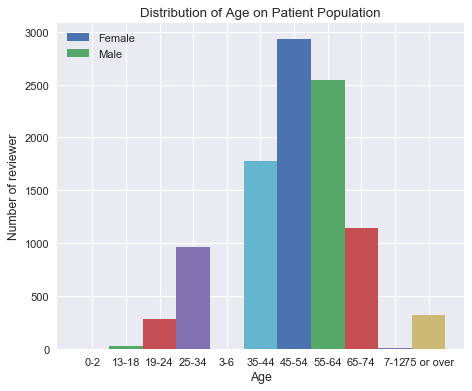

In [25]:
bm=df.groupby('Age')
plt.figure(figsize=(6,5), dpi= 80)
bm['Age'].hist(bins=1,label=bm['Sex'])
plt.title('Distribution of Age on Patient Population')
plt.xlabel('Age')
plt.ylabel('Number of reviewer')
plt.legend(('Female','Male'), loc='upper left')
plt.tight_layout()
plt.show()

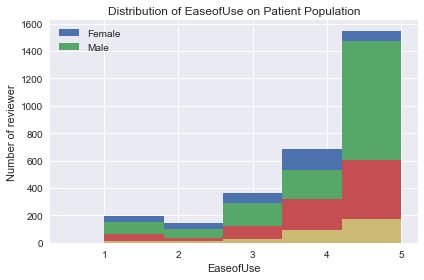

In [26]:
bm['EaseofUse'].hist(bins=5,label=bm['Sex'])
plt.title('Distribution of EaseofUse on Patient Population')
plt.xlabel('EaseofUse')
plt.ylabel('Number of reviewer')
plt.legend(('Female','Male'), loc='upper left')
plt.tight_layout()
plt.show()

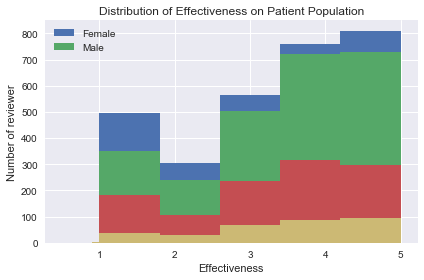

In [27]:
bm['Effectiveness'].hist(bins=5,label=bm['Sex'])
plt.title('Distribution of Effectiveness on Patient Population')
plt.xlabel('Effectiveness')
plt.ylabel('Number of reviewer')
plt.legend(('Female','Male'), loc='upper left')
plt.tight_layout()
plt.show()


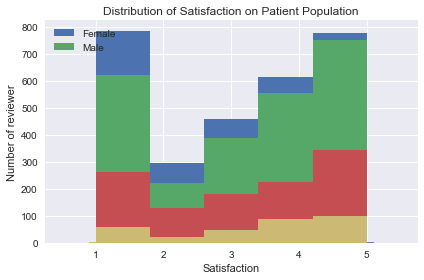

In [28]:
bm['Satisfaction'].hist(bins=5,label=bm['Sex'])
plt.title('Distribution of Satisfaction on Patient Population')
plt.xlabel('Satisfaction')
plt.ylabel('Number of reviewer')
plt.legend(('Female','Male'), loc='upper left')
plt.tight_layout()
plt.show()

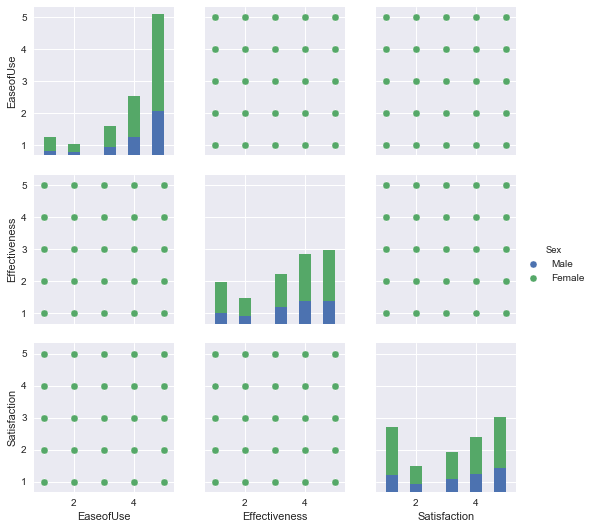

In [29]:
#to see the relaship between features
sns.pairplot(df,hue='Sex')

C:\Users\wityy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\wityy\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
C:\Users\wityy\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


<Figure size 480x400 with 0 Axes>

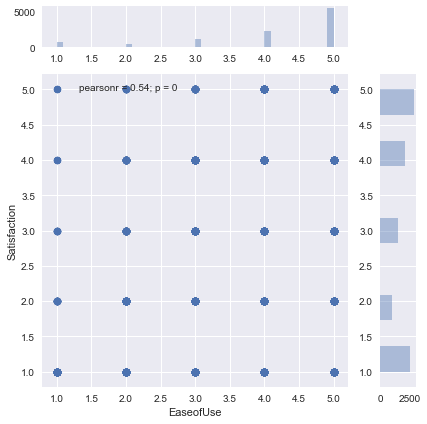

In [31]:
plt.figure(figsize=(6,5), dpi= 80)
sns.jointplot(x=df['EaseofUse'],y=df['Satisfaction'], data=df)
plt.tight_layout()


C:\Users\wityy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\wityy\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
C:\Users\wityy\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


<Figure size 480x400 with 0 Axes>

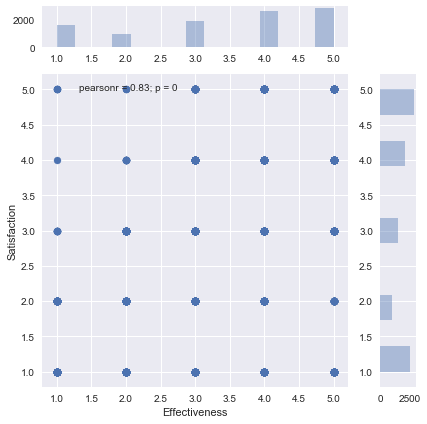

In [32]:
plt.figure(figsize=(6,5), dpi= 80)
sns.jointplot(x=df['Effectiveness'],y=df['Satisfaction'], data=df)
plt.tight_layout()

## 4. Statistical Analysis

### 4.1 Correlation Matrix

A good way to quickly check correlations among columns is by visualizing the correlation matrix as a heatmap using heatmap function of seaborn. In our case we plot the correlation of variables EaseofUse, Effectiveness and Rating. Looking at the plot it the correlation between Effectiveness and Rating is very strong positive correlation than the variables between EaseofUse and Rating. 

In [33]:
df_cor=df.corr()
df_cor

,EaseofUse,Effectiveness,Satisfaction
EaseofUse,1.000000,0.518901,0.539075
Effectiveness,0.518901,1.000000,0.831532
Satisfaction,0.539075,0.831532,1.000000


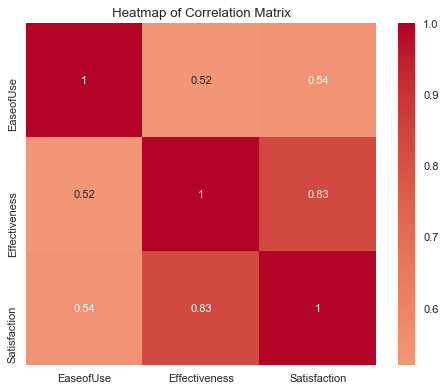

In [34]:
#graphical representation of corellation
plt.figure(figsize=(6,5), dpi= 80)
sns.heatmap(df_cor, annot=True,center = 0, cmap = 'coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.tight_layout()


### 4.2 Hypotheisis formulation

###### Impact of EaseofUse and Satisfaction
Paired sampled t-test :- The paired sample t-test is also called dependent sample t-test. It’s an uni variate test that tests for a significant difference between 2 related variables.

Hypothesis Testing:  Is there significant difference between the patients response towards EaseofUse and Effectiveness?

Null Hypothesis: (H0: pEU = pEF) The null hypothesis would be that there is no difference in patients response of EaseofUse and Effectiveness.
Alternate Hypothesis: (HA: pEU != pEF) The alternative hypothesis would be that there is a difference in patients response of EaseofUse and Effectiveness.

In oder to test this hypothesis, we conducted t-test using ttest_ind()

#### Effectiveness and Satisfaction

In [34]:
from scipy.stats import ttest_ind
from scipy import stats
ttest,pval = stats.ttest_rel(df['EaseofUse'], df['Satisfaction'])
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.0
reject null hypothesis


In [35]:
ttest,pval = stats.ttest_rel(df['Effectiveness'], df['Satisfaction'])
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

4.332130332616386e-133
reject null hypothesis


#### Correlation of Effectiveness and Satisfaction

In [36]:
from scipy.stats import pearsonr
stat, p = pearsonr(df['Effectiveness'], df['Satisfaction'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Effectiveness and Satisfaction of patient are independent')
else:
    print('Effectiveness and Satisfaction of patient are dependent')

stat=0.840, p=0.000
Effectiveness and Satisfaction of patient are dependent


## 5 Regression Model

### Multicollinearity

Before modeling we sgould check multicollinearity which refers to predictors that are correlated with other predictors. Multicollinearity occurs when model includes multiple factors that are correlated not just to the response variable, but also to each other. In other words, it results when we have factors that are a bit redundant. Sklearn does not have a built-in way to check for multicollinearity

In [37]:
# Here's the relevant module
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, declare a variable where we put all features where we want to check for 
#multicollinearity since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = df[['EaseofUse','Effectiveness','Satisfaction']]

# create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns


In [38]:
# Since Effectiveness has the highest VIF, I will remove it from the model
# This will drive the VIF of other variables down!!! 
# So even if Satisfaction seems with a high VIF, too, once 'Effectiveness' is gone that will no longer be the case
vif

,VIF,Features
0,9.383079,EaseofUse
1,22.422662,Effectiveness
2,18.211118,Satisfaction


In [39]:
# Since Year has the highest VIF, I will remove it from the model. # This will drive the VIF of other variables down!!! 
# So even if EngineV seems with a high VIF, too, once 'Year' is gone that will no longer be the case
data_cleaned = df.drop(['Effectiveness'],axis=1)

In [40]:
#rename for simplicity
df=data_cleaned

## 5.2 Machine Learning Modeling

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, metrics
from sklearn import preprocessing
from sklearn import utils
from sklearn.preprocessing import RobustScaler
from sklearn.datasets import load_svmlight_file
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

In [42]:
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB

In [43]:
#preparing input data
#Use built-in stratify mode to ensure equal % label splits
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
X=df.drop('Drug', axis=1)
y=df['Drug']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=123,stratify=y)

In [44]:
def prepare_inpus(X_train,X_test):
    enc=OrdinalEncoder()
    enc.fit(X_train)
    X_train_enc = enc.transform(X_train)
    X_test_enc = enc.transform(X_test)
    return X_train_enc,X_test_enc

In [45]:
def prepare_targets(y_train,y_test):
    enc=OrdinalEncoder()
    enc.fit(y_train)
    y_train_enc = enc.transform(y_train)
    y_test_enc = enc.transform(y_test)
    return y_train_enc,y_test_enc

In [46]:
# prepare input data
X_train_enc, X_test_enc = prepare_inpus(X_train, X_test)
# Feature Scaling: 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler() 
X_train_enc = sc_X.fit_transform(X_train_enc) 
X_test_enc = sc_X.fit_transform(X_test_enc)

In [47]:
# prepare output dat
y_train  = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [48]:
lab_enc = preprocessing.LabelEncoder()
y_test_ency = lab_enc.fit_transform(y_test_enc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
from sklearn import preprocessing

def multiclass_roc_auc_score(y_test,y_pred,average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test=lb.transform(y_test)
    y_pred=lb.transform(y_pred)
    return roc_auc_score(y_test,y_pred,average=average)

### Logistic Regression

Logistic regression works by using a logit function to transform input value of features and calculate estimated probabilities of a label in range of [0,1]. 

In [50]:
logis=LogisticRegression()
logis.fit(X_train_enc, y_train_enc)
y_log_pred = logis.predict(X_test_enc)
log_pred_y = lab_enc.fit_transform(y_log_pred)
sk_report = classification_report(
    digits=3, y_true=y_test_ency, y_pred=log_pred_y)
print('Logistic Regression Result')
print(sk_report)
print('roc_auc_score of Logistic regression is: '+str(multiclass_roc_auc_score(y_test_ency, log_pred_y)))

Logistic Regression Result
              precision    recall  f1-score   support

           0      0.000     0.000     0.000       231
           1      0.094     0.094     0.094       319
           2      0.000     0.000     0.000       340
           3      0.000     0.000     0.000       412
           4      0.000     0.000     0.000       367
           5      0.027     0.015     0.019       394
           6      0.000     0.000     0.000       437

    accuracy                          0.014      2500
   macro avg      0.017     0.016     0.016      2500
weighted avg      0.016     0.014     0.015      2500

roc_auc_score of Logistic regression is: 0.4258584823676685


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Decision Tree Model

Decision tree is an algorithm where it predicts the value of a target variable (label) by learning simple decision rules inferred from selected features. Tree is generated and split data on features. It continues to split in repetitive process at each node until leaves reached purity (i.e., remaining samples at each node belongs to same class either non-stroke or stroke cases only).

In [51]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train_enc, y_train_enc)
y_dtree_pred = dtree.predict(X_test_enc)
dtree_pred_y = lab_enc.fit_transform(y_dtree_pred)
sk_report = classification_report(
    digits=3, y_true=y_test_ency, y_pred=dtree_pred_y)
print('Decision Tree Result')
print(sk_report)
print('roc_auc_score of Decision Tree is: '+str(multiclass_roc_auc_score(y_test_ency, dtree_pred_y)))

Decision Tree Result
              precision    recall  f1-score   support

           0      0.378     0.364     0.371       231
           1      0.533     0.483     0.507       319
           2      0.696     0.882     0.778       340
           3      0.515     0.687     0.589       412
           4      0.527     0.510     0.518       367
           5      0.810     0.863     0.835       394
           6      0.513     0.275     0.358       437

    accuracy                          0.587      2500
   macro avg      0.567     0.580     0.565      2500
weighted avg      0.577     0.587     0.572      2500

roc_auc_score of Decision Tree is: 0.7557108954420747


### Random forest

Random forest is a typical ensemble learning model. It takes random subsample of data from each tree, so all constructed trees are different from each other. Thus, model makes classification based on predictions made from each tree with averaging (i.e., like picking a vote from majority).

In [52]:
rf = RandomForestClassifier()
rf.fit(X_train_enc, y_train_enc)
y_rf_pred = rf.predict(X_test_enc);
rf_pred_y = lab_enc.fit_transform(y_rf_pred)
sk_report = classification_report(
    digits=3, y_true=y_test_ency, y_pred=rf_pred_y)
print('Random Forest Result')
print(sk_report)
print('roc_auc_score of Random Forest is: '+str(multiclass_roc_auc_score(y_test_ency, rf_pred_y)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Result
              precision    recall  f1-score   support

           0      0.387     0.342     0.363       231
           1      0.553     0.455     0.499       319
           2      0.698     0.862     0.771       340
           3      0.510     0.670     0.579       412
           4      0.532     0.537     0.535       367
           5      0.810     0.868     0.838       394
           6      0.484     0.311     0.379       437

    accuracy                          0.587      2500
   macro avg      0.568     0.578     0.566      2500
weighted avg      0.576     0.587     0.574      2500

roc_auc_score of Random Forest is: 0.7543139775995407


In [53]:
knn = KNeighborsClassifier()
knn.fit(X_train_enc, y_train_enc)
y_knn_pred = knn.predict(X_test_enc)
kn_pred_y = lab_enc.fit_transform(y_knn_pred)
sk_report = classification_report(
    digits=3, y_true=y_test_ency, y_pred=kn_pred_y)
print('KNeighborsClassifier Result')
print(sk_report)
print('roc_auc_score of KNeighborsClassifier is: '+str(multiclass_roc_auc_score(y_test_ency, kn_pred_y)))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier Result
              precision    recall  f1-score   support

           0      0.323     0.390     0.353       231
           1      0.478     0.448     0.463       319
           2      0.690     0.824     0.751       340
           3      0.515     0.578     0.545       412
           4      0.539     0.529     0.534       367
           5      0.800     0.865     0.832       394
           6      0.496     0.304     0.377       437

    accuracy                          0.568      2500
   macro avg      0.549     0.563     0.551      2500
weighted avg      0.562     0.568     0.559      2500

roc_auc_score of KNeighborsClassifier is: 0.7452475220733984


In [54]:
gas = GaussianNB()
gas.fit(X_train_enc, y_train_enc)
y_gas_pred = gas.predict(X_test_enc)
ga_pred_y = lab_enc.fit_transform(y_gas_pred)
sk_report = classification_report(
    digits=3, y_true=y_test_ency, y_pred=ga_pred_y)
print('GuasianNB Result')
print(sk_report)
print('roc_auc_score of GuasianNB is: '+str(multiclass_roc_auc_score(y_test_ency, ga_pred_y)))

GuasianNB Result
              precision    recall  f1-score   support

           0      0.312     0.043     0.076       231
           1      0.311     0.361     0.334       319
           2      0.000     0.000     0.000       340
           3      0.000     0.000     0.000       412
           4      0.000     0.000     0.000       367
           5      0.053     0.033     0.041       394
           6      0.000     0.000     0.000       437

    accuracy                          0.055      2500
   macro avg      0.097     0.062     0.064      2500
weighted avg      0.077     0.055     0.056      2500

roc_auc_score of GuasianNB is: 0.45212561764410925


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [55]:
kms = KMeans()
kms.fit(X_train_enc, y_train_enc)
y_kms_pred = kms.predict(X_test_enc)
km_pred_y = lab_enc.fit_transform(y_kms_pred)
sk_report = classification_report(
    digits=3, y_true=y_test_ency, y_pred=km_pred_y)
print('KMeans Result')
print(sk_report)
print('roc_auc_score of KMeans is: '+str(multiclass_roc_auc_score(y_test_ency, km_pred_y)))

KMeans Result
              precision    recall  f1-score   support

           0      0.107     0.117     0.112       231
           1      0.054     0.094     0.069       319
           2      0.324     0.232     0.271       340
           3      0.000     0.000     0.000       412
           4      0.000     0.000     0.000       367
           5      0.080     0.081     0.081       394
           6      0.228     0.142     0.175       437
           7      0.000     0.000     0.000         0

    accuracy                          0.092      2500
   macro avg      0.099     0.083     0.088      2500
weighted avg      0.113     0.092     0.099      2500

roc_auc_score of KMeans is: 0.47823714675940526


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [56]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train_enc, y_train_enc)
y_gbc_pred = gbc.predict(X_test_enc)
gb_pred_y = lab_enc.fit_transform(y_gbc_pred)
sk_report = classification_report(
    digits=3, y_true=y_test_ency, y_pred=gb_pred_y)
print('GradientBoostingClassifier Result')
print(sk_report)
print('roc_auc_score of GradientBoostingClassifier is: '+str(multiclass_roc_auc_score(y_test_ency, gb_pred_y)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier Result
              precision    recall  f1-score   support

           0      0.393     0.048     0.085       231
           1      0.578     0.370     0.451       319
           2      0.700     0.912     0.792       340
           3      0.432     0.913     0.587       412
           4      0.578     0.518     0.546       367
           5      0.800     0.865     0.832       394
           6      0.565     0.259     0.355       437

    accuracy                          0.584      2500
   macro avg      0.578     0.555     0.521      2500
weighted avg      0.586     0.584     0.543      2500

roc_auc_score of GradientBoostingClassifier is: 0.7422070682703418


### XGBoost model

XGBoost is a type of gradient boosting model in which subsequent model learns from the mistakes (i.e., residual errors) of previous model in a step-wise forward manner. In Gradient Boosting, residual errors are identified gradients. These gradients help how XGBoost to improve model performances.

In [57]:
xgbc = XGBClassifier()
xgbc.fit(X_train_enc, y_train_enc)
y_xgbc_pred = xgbc.predict(X_test_enc)
xgb_pred_y = lab_enc.fit_transform(y_xgbc_pred)
sk_report = classification_report(
    digits=3, y_true=y_test_ency, y_pred=xgb_pred_y)
print('XGBClassifier Result')
print(sk_report)
print('roc_auc_score of XGBClassifier is: '+str(multiclass_roc_auc_score(y_test_ency, xgb_pred_y)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier Result
              precision    recall  f1-score   support

           0      0.396     0.320     0.354       231
           1      0.585     0.473     0.523       319
           2      0.704     0.888     0.785       340
           3      0.491     0.772     0.600       412
           4      0.581     0.529     0.553       367
           5      0.818     0.868     0.842       394
           6      0.575     0.297     0.392       437

    accuracy                          0.604      2500
   macro avg      0.593     0.593     0.579      2500
weighted avg      0.603     0.604     0.588      2500

roc_auc_score of XGBClassifier is: 0.7631380851603894


In [58]:
ext = ExtraTreesClassifier()
ext.fit(X_train_enc, y_train_enc)
y_ext_pred = ext.predict(X_test_enc)
ex_pred_y = lab_enc.fit_transform(y_ext_pred)
sk_report = classification_report(
    digits=3, y_true=y_test_ency, y_pred=ex_pred_y)
print('ExtracTreeClassifier Result')
print(sk_report)
print('roc_auc_score of ExtracTreeClassifier is: '+str(multiclass_roc_auc_score(y_test_ency, ex_pred_y)))

ExtracTreeClassifier Result
              precision    recall  f1-score   support

           0      0.407     0.333     0.367       231
           1      0.580     0.489     0.531       319
           2      0.699     0.894     0.785       340
           3      0.508     0.723     0.597       412
           4      0.540     0.540     0.540       367
           5      0.822     0.855     0.838       394
           6      0.527     0.293     0.376       437

    accuracy                          0.599      2500
   macro avg      0.583     0.590     0.576      2500
weighted avg      0.591     0.599     0.584      2500

roc_auc_score of ExtracTreeClassifier is: 0.7612612579583222


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [59]:
bag =  BaggingClassifier()
bag.fit(X_train_enc, y_train_enc)
y_bag_pred = bag.predict(X_test_enc)
ba_pred_y = lab_enc.fit_transform(y_bag_pred)
sk_report = classification_report(
    digits=3, y_true=y_test_ency, y_pred=ba_pred_y)
print('BaggingClassifier Result')
print(sk_report)
print('roc_auc_score of BaggingClassifier is: '+str(multiclass_roc_auc_score(y_test_ency, ba_pred_y)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier Result
              precision    recall  f1-score   support

           0      0.408     0.325     0.361       231
           1      0.556     0.470     0.509       319
           2      0.721     0.835     0.774       340
           3      0.506     0.697     0.586       412
           4      0.536     0.510     0.522       367
           5      0.820     0.865     0.842       394
           6      0.500     0.366     0.423       437

    accuracy                          0.594      2500
   macro avg      0.578     0.581     0.574      2500
weighted avg      0.585     0.594     0.584      2500

roc_auc_score of BaggingClassifier is: 0.756481338817519


In [60]:
linSVC=LinearSVC()
linSVC.fit(X_train_enc, y_train_enc)
y_linSVC_pred=linSVC.predict(X_test_enc);
linSVC_pred_y = lab_enc.fit_transform(y_linSVC_pred)
sk_report = classification_report(
    digits=3, y_true=y_test_ency, y_pred=linSVC_pred_y)
print('LinearSVC Result')
print(sk_report)
print('roc_auc_score of LinearSVC is: '+str(multiclass_roc_auc_score(y_test_ency, linSVC_pred_y)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC Result
              precision    recall  f1-score   support

           0      0.004     0.004     0.004       231
           1      0.072     0.060     0.065       319
           2      0.000     0.000     0.000       340
           3      0.000     0.000     0.000       412
           4      0.000     0.000     0.000       367
           5      0.000     0.000     0.000       394
           6      0.000     0.000     0.000       437

    accuracy                          0.008      2500
   macro avg      0.011     0.009     0.010      2500
weighted avg      0.009     0.008     0.009      2500

roc_auc_score of LinearSVC is: 0.4221281118999043


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [61]:
dict={'ModelName':['LogisticRegression','LinearSVC','DecisionTree',
                   'RandomForest','ExtracTreeClassifier','KNeighborsClassifier','KMeans',
                   'GradientBoostingClassifier','XGBClassifier','BaggingClassifier','GuasianNB'],
      'Result':[0.05,0.09,0.65,0.64,0.65,0.61,0.142,0.58,0.63,0.65,0.51]}

In [62]:
Accuracy =pd.DataFrame.from_dict(dict)
Accuracy

,ModelName,Result
0,LogisticRegression,0.050
1,LinearSVC,0.090
2,DecisionTree,0.650
3,RandomForest,0.640
4,ExtracTreeClassifier,0.650
5,KNeighborsClassifier,0.610
6,KMeans,0.142
7,GradientBoostingClassifier,0.580
8,XGBClassifier,0.630
9,BaggingClassifier,0.650


In [63]:
Accuracy['Result'].max()
Accuracy[Accuracy['Result']==0.65]

,ModelName,Result
2,DecisionTree,0.65
4,ExtracTreeClassifier,0.65
9,BaggingClassifier,0.65


In [64]:
print("______________________________________________")
print('MAE of Decision Tree:', metrics.mean_absolute_error(y_test_ency,dtree_pred_y))
print('MSE of Decision Tree:', metrics.mean_squared_error(y_test_ency,dtree_pred_y))
print('RMSE of Decision Tree:', np.sqrt(metrics.mean_squared_error(y_test_ency,dtree_pred_y)))
print("______________________________________________")
print('MAE of Random Forest:', metrics.mean_absolute_error(y_test_ency,rf_pred_y))
print('MSE of Random Forest:', metrics.mean_squared_error(y_test_ency,rf_pred_y))
print('RMSE of Random Forest:', np.sqrt(metrics.mean_squared_error(y_test_ency,rf_pred_y)))
print("______________________________________________")
print('MAE of GradientBoostingClassifier:', metrics.mean_absolute_error(y_test_ency,gb_pred_y))
print('MSE of GradientBoostingClassifier:', metrics.mean_squared_error(y_test_ency,gb_pred_y))
print('RMSE of GradientBoostingClassifier:', np.sqrt(metrics.mean_squared_error(y_test_ency,gb_pred_y)))
print("______________________________________________")
print('MAE of XGBClassifier:', metrics.mean_absolute_error(y_test_ency,xgb_pred_y))
print('MSE of XGBClassifier:', metrics.mean_squared_error(y_test_ency,xgb_pred_y))
print('RMSE of XGBClassifier:', np.sqrt(metrics.mean_squared_error(y_test_ency,xgb_pred_y)))
print("______________________________________________")
print('MAE of ExtracTreeClassifier:', metrics.mean_absolute_error(y_test_ency,ex_pred_y))
print('MSE of ExtracTreeClassifier:', metrics.mean_squared_error(y_test_ency,ex_pred_y))
print('RMSE of ExtracTreeClassifier:', np.sqrt(metrics.mean_squared_error(y_test_ency,ex_pred_y)))
print("______________________________________________")
print('MAE of BaggingClassifier:', metrics.mean_absolute_error(y_test_ency,ba_pred_y))
print('MSE of BaggingClassifier:', metrics.mean_squared_error(y_test_ency,ba_pred_y))
print('RMSE of BaggingClassifier:', np.sqrt(metrics.mean_squared_error(y_test_ency,ba_pred_y)))
print("______________________________________________")

______________________________________________
MAE of Decision Tree: 1.1812
MSE of Decision Tree: 3.9972
RMSE of Decision Tree: 1.9992998774571062
______________________________________________
MAE of Random Forest: 1.1968
MSE of Random Forest: 4.1064
RMSE of Random Forest: 2.0264254242384543
______________________________________________
MAE of GradientBoostingClassifier: 1.1076
MSE of GradientBoostingClassifier: 3.4012
RMSE of GradientBoostingClassifier: 1.8442342584389868
______________________________________________
MAE of XGBClassifier: 1.1132
MSE of XGBClassifier: 3.6804
RMSE of XGBClassifier: 1.918436863699194
______________________________________________
MAE of ExtracTreeClassifier: 1.1388
MSE of ExtracTreeClassifier: 3.8404
RMSE of ExtracTreeClassifier: 1.9596938536414303
______________________________________________
MAE of BaggingClassifier: 1.1648
MSE of BaggingClassifier: 3.9648
RMSE of BaggingClassifier: 1.9911805543445829
______________________________________________


In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test_ency, logis.predict_proba(X_test_enc)[:,1],pos_label=2)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test_ency, rf.predict_proba(X_test_enc)[:,1],pos_label=2)
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test_ency, dtree.predict_proba(X_test_enc)[:,1],pos_label=2)
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test_ency, knn.predict_proba(X_test_enc)[:,1],pos_label=2)
gas_fpr, gas_tpr, gas_thresholds = roc_curve(y_test_ency, gas.predict_proba(X_test_enc)[:,1],pos_label=2)
#kms_fpr, kms_tpr, kms_thresholds = roc_curve(y_test_ency, kms.predict_proba(X_test_enc)[:,1],pos_label=2)
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(y_test_ency, gbc.predict_proba(X_test_enc)[:,1],pos_label=2)
ext_fpr, ext_tpr, ext_thresholds = roc_curve(y_test_ency, ext.predict_proba(X_test_enc)[:,1],pos_label=2)
#linSVC_fpr, linSVC_tpr, linSVC_thresholds = roc_curve(y_test_ency, linSVC.predict_proba(X_test_enc)[:,1],pos_label=2)
bag_fpr, bag_tpr, bag_thresholds = roc_curve(y_test_ency, bag.predict_proba(X_test_enc)[:,1],pos_label=2)
xgbc_fpr, xgbc_tpr, xgbc_thresholds = roc_curve(y_test_ency, xgbc.predict_proba(X_test_enc)[:,1],pos_label=2)

plt.figure()


In [ ]:
# Plot Logistic Regression ROC
logit_roc_auc = multiclass_roc_auc_score(y_test_ency, log_pred_y)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

# Plot Random Forest ROC
rf_roc_auc = multiclass_roc_auc_score(y_test_ency, rf_pred_y)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
dtree_roc_auc = multiclass_roc_auc_score(y_test_ency, dtree_pred_y)
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dtree_roc_auc)

# Plot XBoosts ROC
xgb_roc_auc = multiclass_roc_auc_score(y_test_ency, xgb_pred_y)
plt.plot(xgbc_fpr, xgbc_tpr, label='XBoosts (area = %0.2f)' % xgb_roc_auc)

# Plot ExtracTree ROC
ex_roc_auc = multiclass_roc_auc_score(y_test_ency, ex_pred_y)
plt.plot(ext_fpr, ext_tpr, label='ExtracTree (area = %0.2f)' % ex_roc_auc)

# Plot GradientBoosting ROC
gbc_roc_auc = multiclass_roc_auc_score(y_test_ency, gb_pred_y)
plt.plot(gbc, gbc_tpr, label='GradientBoosting (area = %0.2f)' % gbc_roc_auc)

# Plot Bagging ROC
bag_roc_auc = multiclass_roc_auc_score(y_test_ency, bag_pred_y)
plt.plot(bag_fpr, bag_tpr, label='Bagging (area = %0.2f)' % bag_roc_auc)

# Plot GuasianNB ROC
gas_roc_auc = multiclass_roc_auc_score(y_test_ency, ga_pred_y)
plt.plot(bag_fpr, bag_tpr, label='GuasianNB (area = %0.2f)' % gas_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

In [ ]:
logit_roc_auc = multiclass_roc_auc_score(y_test_ency, log_pred_y)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)